In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
data_noIntervention = pd.read_csv("no_interventions.csv", sep=",")
data_noIntervention = data_noIntervention.drop(["Unnamed: 0"], axis=1)


print(data_noIntervention.columns)
for node in data_noIntervention:
    print("Node {} has a mean of {} and a sd of {}.".format(node, np.mean(data_noIntervention[node]), np.std(data_noIntervention[node])))
print(np.mean(data_noIntervention['A']))

mean_B, std_B = np.mean(data_noIntervention['B']), np.std(data_noIntervention['B'])
mean_E, std_E = np.mean(data_noIntervention['E']), np.std(data_noIntervention['E'])

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
Node A has a mean of 1.3698896094718327 and a sd of 1.1014896644832854.
Node B has a mean of 0.5407399611575715 and a sd of 2.236391824250834.
Node C has a mean of -0.26510669570840895 and a sd of 1.5564606014451707.
Node D has a mean of 1.0131585296288732 and a sd of 1.2517031317247211.
Node E has a mean of 0.005106695708408988 and a sd of 0.18387075189369084.
Node F has a mean of -0.7479583698267538 and a sd of 0.889727881219403.
1.3698896094718327


In [58]:
### Define the following variables with their respective distributions
B = stats.norm(loc=mean_B, scale=std_B)
E = stats.norm(loc=mean_E, scale=std_E)

EOutcomes = [-2, -1, 0, 1, 2]
p = []

for i in EOutcomes: 
    logicalMask = [(i-0.5 <= j <= i+0.5) for j in data_noIntervention['C']]
    p.append(np.sum(logicalMask)/len(data_noIntervention))

C = stats.multinomial(n=5, p=p)

In [ ]:
def sample(N,forcep=None):
    Np=B.rvs(N)
    Ns=C.rvs(N)
    Nc=E.rvs(N)
    ### Write the assumptions here(The imagining)
    
    # I don't know what the following if statement does
    # But if you found out, use it;)
    
    #if not forcep is None:
    #    P2=np.ones(N)*forcep
    #    V2=(Np*P2+Ns*S)
    #    C2=((V2>0)-Nc)>0
    #    out=np.concatenate((out[None],np.array((V2,C2))[None]),axis=0)
    return out

# Visualizations

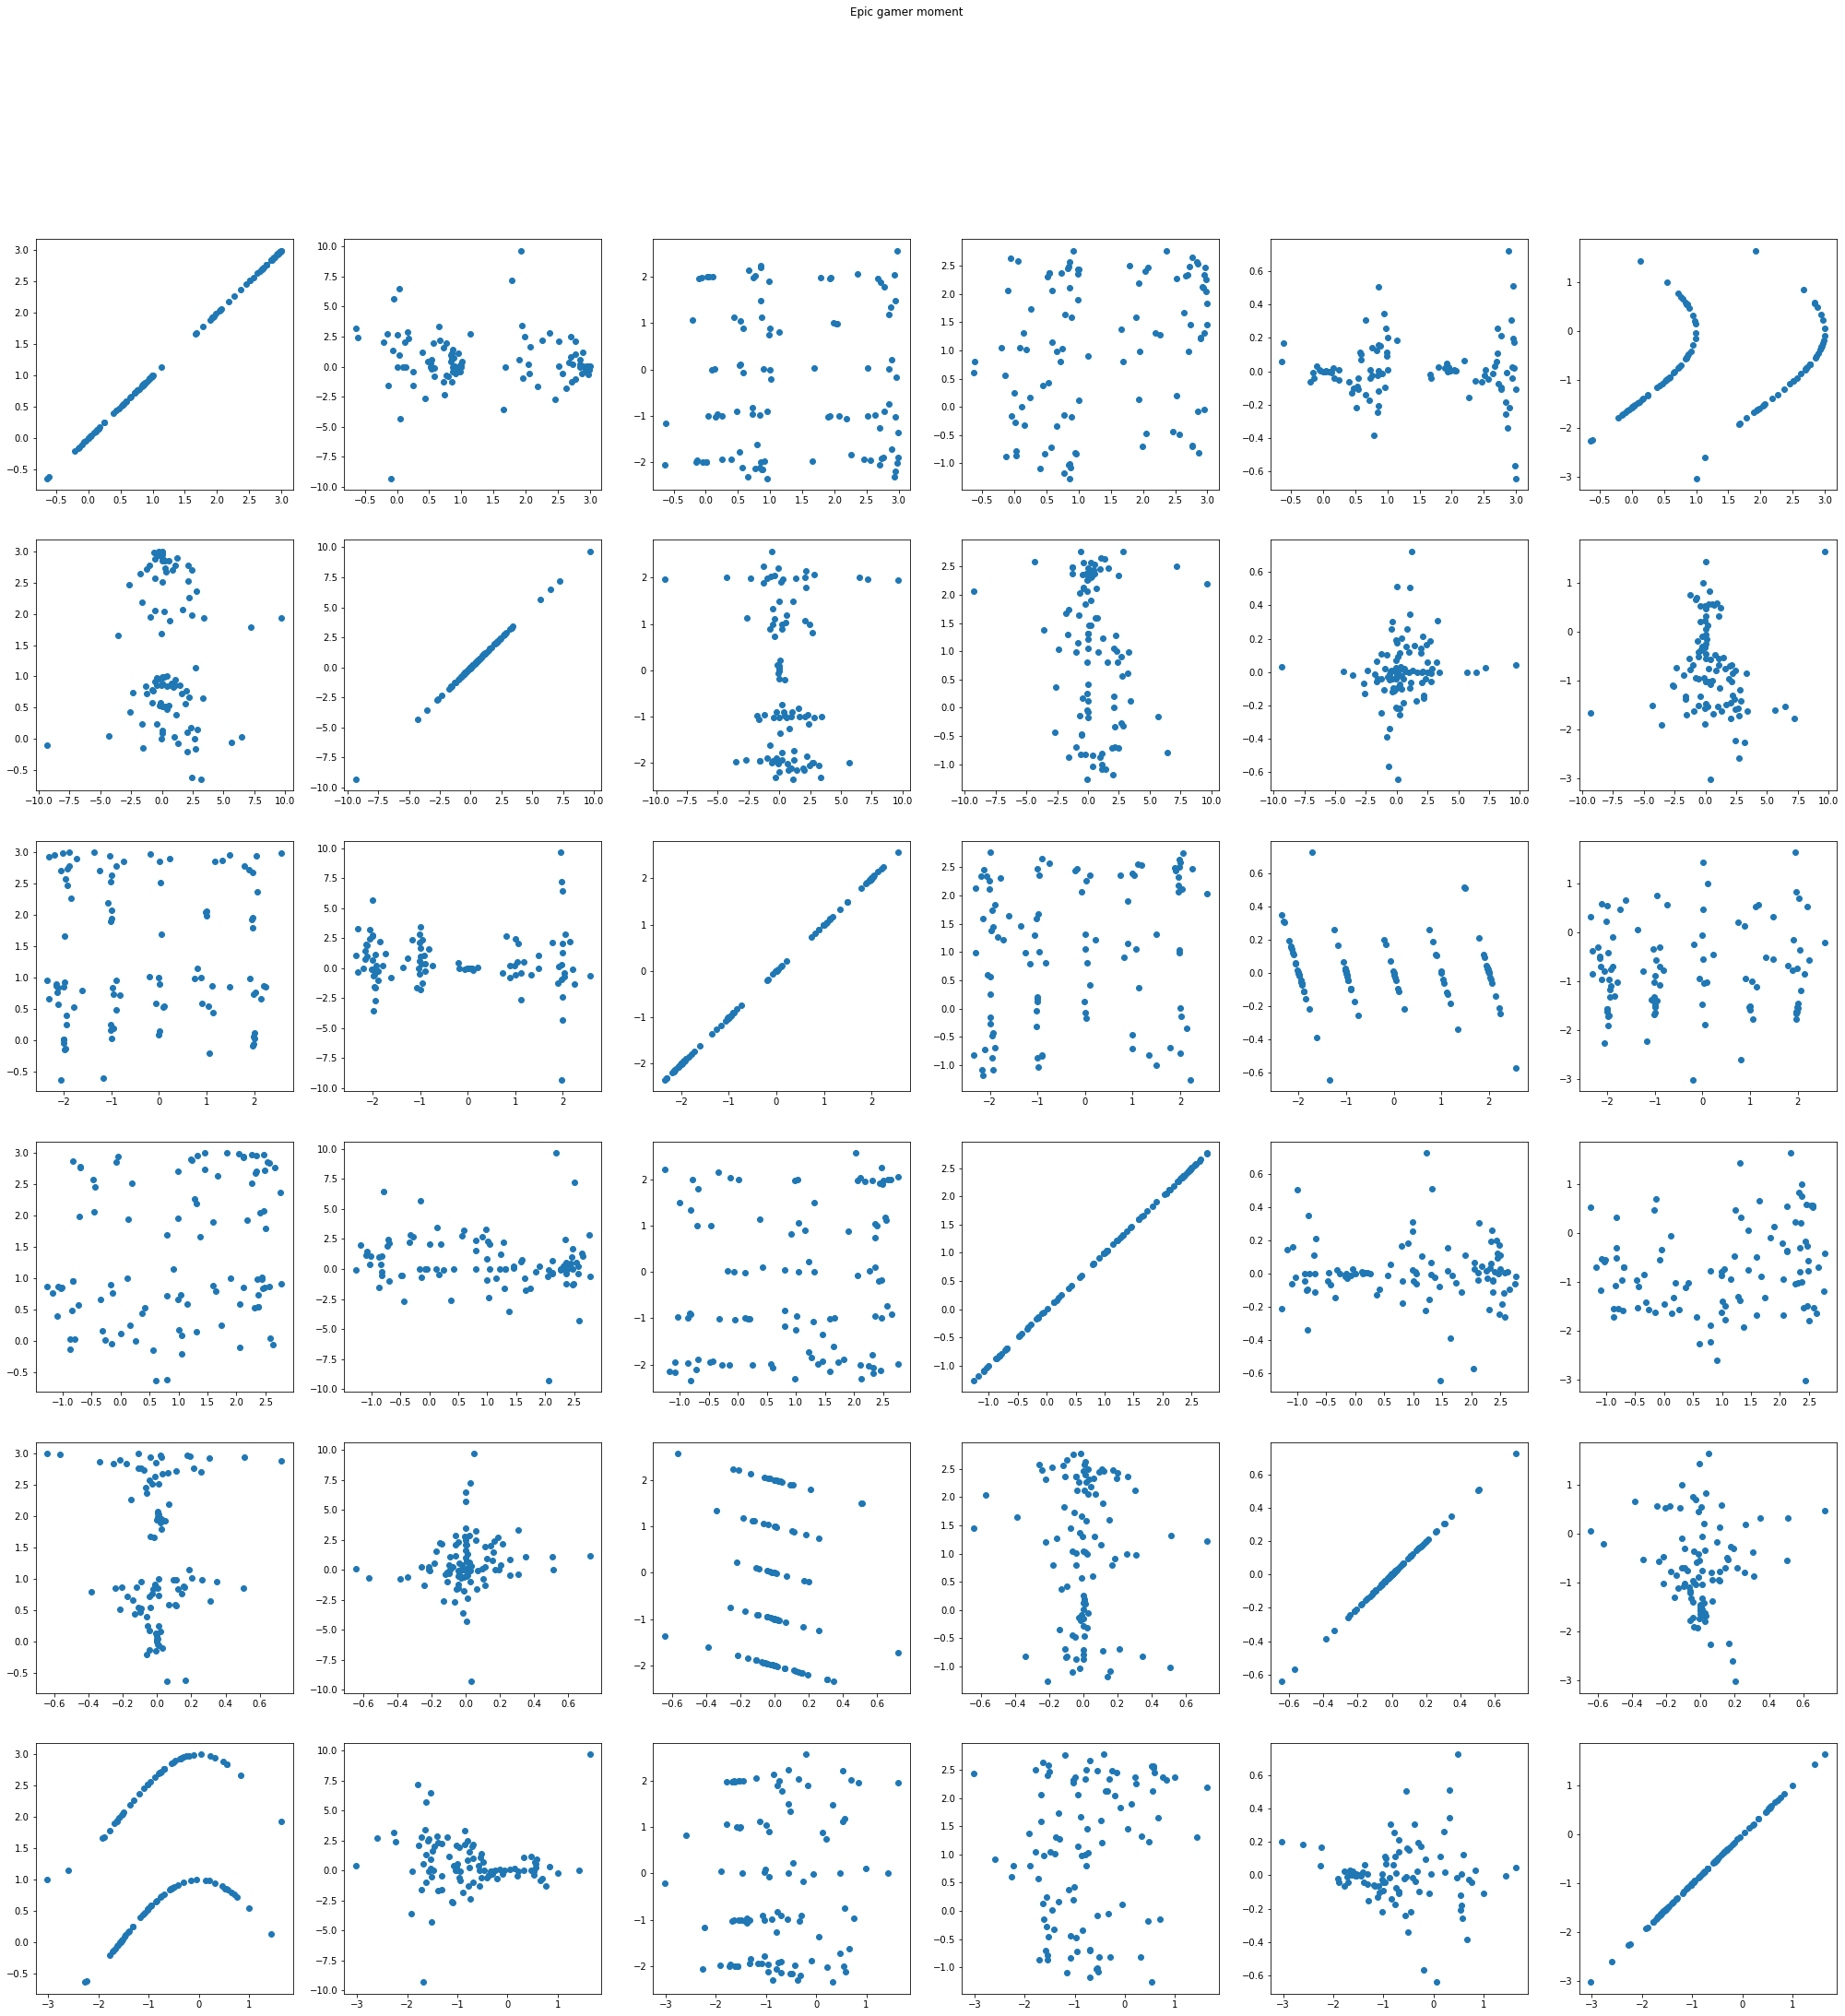

In [23]:
fig, axs = plt.subplots(6, 6)
fig.set_size_inches(35, 35)
fig.suptitle('Epic gamer moment')

columns = ['A', 'B', 'C', 'D', 'E', 'F']
for i in range(6):
    for j in range(6):
        axs[i,j].scatter(data_noIntervention[columns[i]], data_noIntervention[columns[j]])

plt.show()

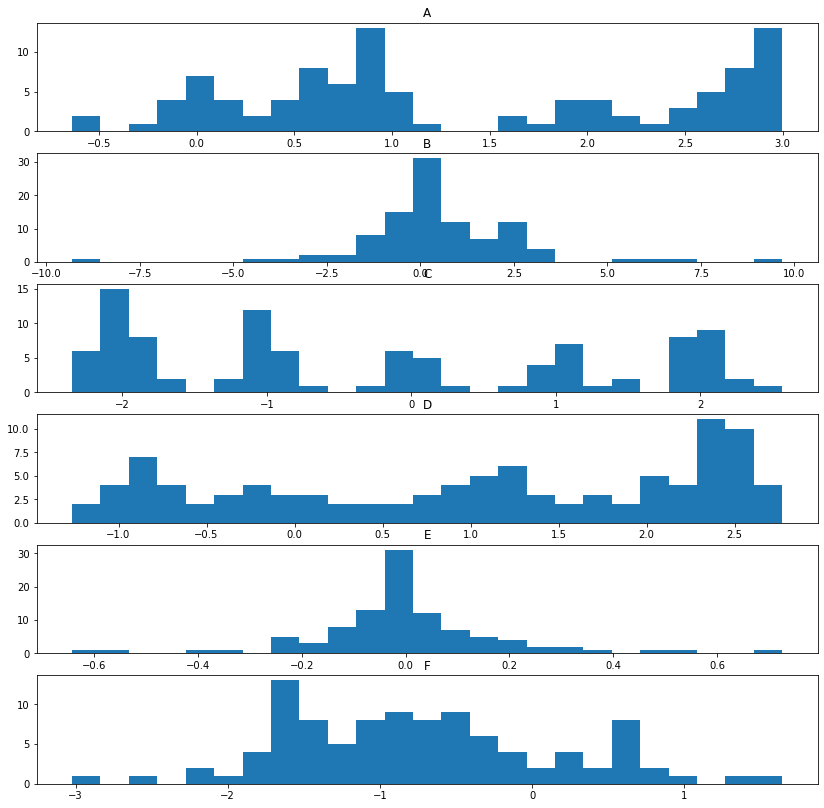

In [26]:
fig, axs = plt.subplots(6, figsize=(14,14))
for i, node in enumerate(data_noIntervention.keys()):
    axs[i].title.set_text(f"{node}")
    axs[i].hist(data_noIntervention[node], bins=25)
plt.show()